# Project 3
## CS 7324
#### Jennifer Carballo & Amory Weinzierl

In [1]:
# import libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import warnings
warnings.filterwarnings('ignore')

#### load in datasets

In [2]:
# load in real estate dataset

real_estate_df = pd.read_csv("data/WakeCountyHousing.csv")

# display df
real_estate_df.head()

,Real_Estate_Id,Deeded_Acreage,Total_Sale_Price,Total_Sale_Date,Month_Year_of_Sale,Year_of_Sale,Year_Built,Year_Remodeled,Heated_Area,Num_Stories,Design_Style,Bath,Utilities,Physical_City,Physical_Zip
0,19,0.21,34500,1/1/1974,January 1974,1974,1964,1964,1828,One Story,Split level,2 Bath,ALL,Raleigh,27610.0
1,20,0.46,35500,5/18/1983,May 1983,1983,1970,1970,1240,One Story,Conventional,1 Bath,E,Raleigh,27610.0
2,22,0.46,37500,9/16/2004,September 2004,2004,1900,1900,2261,One Story,Conventional,2 Bath,WSE,Wendell,27591.0
3,25,0.96,70000,1/1/1971,January 1971,1971,1971,1971,3770,One Story,Conventional,Other,WGE,Raleigh,27613.0
4,30,0.47,380000,8/12/2015,August 2015,2015,1946,2017,1789,One Story,Conventional,2 Bath,ALL,Raleigh,27607.0


In [3]:
# load in reddit upvote dataset - test and train

reddit_upvotes_train_df = pd.read_csv("data/train_NIR5Yl1.csv")
reddit_upvotes_test_df = pd.read_csv("data/test_8i3B3FC.csv")

reddit_upvotes_train_df.head()

,ID,Tag,Reputation,Answers,Username,Views,Upvotes
0,52664,a,3942.0,2.0,155623,7855.0,42.0
1,327662,a,26046.0,12.0,21781,55801.0,1175.0
2,468453,c,1358.0,4.0,56177,8067.0,60.0
3,96996,a,264.0,3.0,168793,27064.0,9.0
4,131465,c,4271.0,4.0,112223,13986.0,83.0


In [4]:
reddit_upvotes_test_df.head()

,ID,Tag,Reputation,Answers,Username,Views
0,366953,a,5645.0,3.0,50652,33200.0
1,71864,c,24511.0,6.0,37685,2730.0
2,141692,i,927.0,1.0,135293,21167.0
3,316833,i,21.0,6.0,166998,18528.0
4,440445,i,4475.0,10.0,53504,57240.0


In [5]:
# load in uber fare dataset

uber_fares_df = pd.read_csv("data/uber.csv")
uber_fares_df = uber_fares_df.rename(columns={'Unnamed: 0': 'index'})
uber_fares_df = uber_fares_df.set_index("index")

uber_fares_df.head()

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
index,,,,,,,,
24238194,2015-05-07 19:52:06.0000003,7.5,2015-05-07 19:52:06 UTC,-73.999817,40.738354,-73.999512,40.723217,1
27835199,2009-07-17 20:04:56.0000002,7.7,2009-07-17 20:04:56 UTC,-73.994355,40.728225,-73.994710,40.750325,1
44984355,2009-08-24 21:45:00.00000061,12.9,2009-08-24 21:45:00 UTC,-74.005043,40.740770,-73.962565,40.772647,1
25894730,2009-06-26 08:22:21.0000001,5.3,2009-06-26 08:22:21 UTC,-73.976124,40.790844,-73.965316,40.803349,3
17610152,2014-08-28 17:47:00.000000188,16.0,2014-08-28 17:47:00 UTC,-73.925023,40.744085,-73.973082,40.761247,5


#### explore data

##### explore real estate data

In [6]:
real_estate_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 308292 entries, 0 to 308291
Data columns (total 15 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   Real_Estate_Id      308292 non-null  int64  
 1   Deeded_Acreage      308292 non-null  float64
 2   Total_Sale_Price    308292 non-null  int64  
 3   Total_Sale_Date     308292 non-null  object 
 4   Month_Year_of_Sale  308292 non-null  object 
 5   Year_of_Sale        308292 non-null  int64  
 6   Year_Built          308292 non-null  int64  
 7   Year_Remodeled      308292 non-null  int64  
 8   Heated_Area         308292 non-null  int64  
 9   Num_Stories         308292 non-null  object 
 10  Design_Style        308292 non-null  object 
 11  Bath                308275 non-null  object 
 12  Utilities           306324 non-null  object 
 13  Physical_City       308183 non-null  object 
 14  Physical_Zip        308146 non-null  float64
dtypes: float64(2), int64(6), object(7)

In [7]:
real_estate_df.describe()

,Real_Estate_Id,Deeded_Acreage,Total_Sale_Price,Year_of_Sale,Year_Built,Year_Remodeled,Heated_Area,Physical_Zip
count,308292.000000,308292.000000,3.082920e+05,308292.000000,308292.000000,308292.000000,308292.000000,308146.000000
mean,244524.805863,0.443446,2.738410e+05,2009.583593,1994.992666,1995.810647,2267.375890,27572.340936
std,129858.542506,1.851256,1.904003e+05,10.517202,19.671737,19.321347,997.488231,41.800280
min,19.000000,0.000000,0.000000e+00,1956.000000,0.000000,0.000000,220.000000,27501.000000
25%,140864.750000,0.140000,1.500000e+05,2004.000000,1986.000000,1986.000000,1532.000000,27526.000000
50%,244362.500000,0.240000,2.350000e+05,2013.000000,1999.000000,2000.000000,2087.000000,27591.000000
75%,346481.250000,0.420000,3.500000e+05,2018.000000,2007.000000,2008.000000,2794.000000,27610.000000
max,484520.000000,307.910000,6.100200e+06,2021.000000,2022.000000,2209.000000,21993.000000,27713.000000


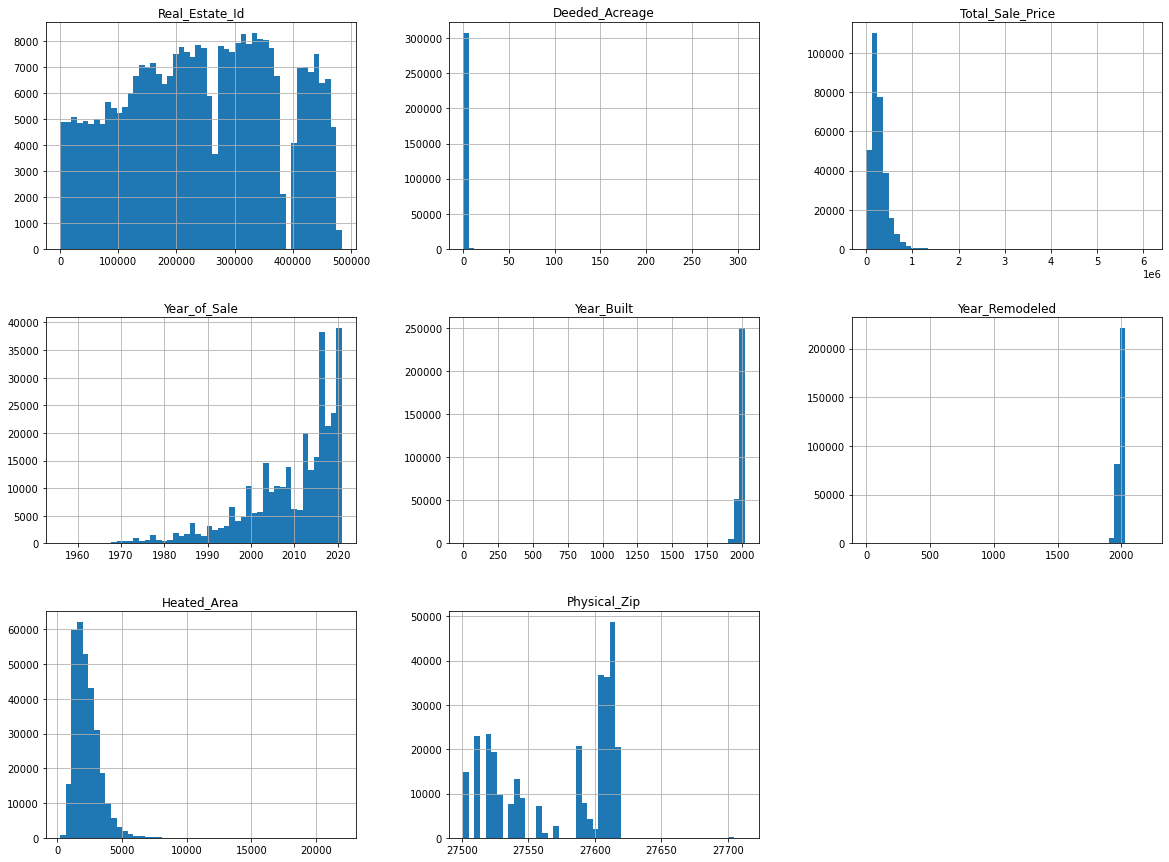

In [8]:
real_estate_df.hist(bins=50, figsize=(20,15))
plt.show()

In [9]:
real_estate_df.isna().sum().sum()

2240

In [10]:
for columnName in real_estate_df:
    print(columnName, real_estate_df[columnName].dtypes)

Real_Estate_Id int64
Deeded_Acreage float64
Total_Sale_Price int64
Total_Sale_Date object
Month_Year_of_Sale object
Year_of_Sale int64
Year_Built int64
Year_Remodeled int64
Heated_Area int64
Num_Stories object
Design_Style object
Bath object
Utilities object
Physical_City object
Physical_Zip float64


In [11]:
for columnName in real_estate_df:
    print(columnName, real_estate_df[columnName].isna().sum())

Real_Estate_Id 0
Deeded_Acreage 0
Total_Sale_Price 0
Total_Sale_Date 0
Month_Year_of_Sale 0
Year_of_Sale 0
Year_Built 0
Year_Remodeled 0
Heated_Area 0
Num_Stories 0
Design_Style 0
Bath 17
Utilities 1968
Physical_City 109
Physical_Zip 146


In [12]:
real_estate_df['Bath'].value_counts()

2½ Bath     129385
2 Bath       57817
3½ Bath      54286
3 Bath       29079
Other        14398
1 Bath       12376
1 ½ Bath     10934
Name: Bath, dtype: int64

In [13]:
real_estate_df[real_estate_df['Bath'].isna()]

,Real_Estate_Id,Deeded_Acreage,Total_Sale_Price,Total_Sale_Date,Month_Year_of_Sale,Year_of_Sale,Year_Built,Year_Remodeled,Heated_Area,Num_Stories,Design_Style,Bath,Utilities,Physical_City,Physical_Zip
1352,2721,0.46,129000,11/17/2015,November 2015,2015,1961,1961,1378,One Story,Conventional,NaN,E,Raleigh,27603.0
39833,78972,33.23,50000,8/22/1986,August 1986,1986,1966,1966,484,One Story,Conventional,NaN,E,Knightdale,27545.0
108501,185162,4.07,155000,9/28/2016,September 2016,2016,1940,1940,656,One Story,Conventional,NaN,E,Wake Forest,27587.0
209049,319962,0.17,199000,6/25/2019,June 2019,2019,2005,2005,1927,Other,Conventional,NaN,ALL,Raleigh,27610.0
214933,327233,0.19,333500,10/21/2005,October 2005,2005,2005,2005,2940,Other,Conventional,NaN,ALL,Cary,27519.0
215749,328215,1.14,177000,7/14/2006,July 2006,2006,2005,2005,1381,One Story,Conventional,NaN,E,Zebulon,27597.0
240579,357802,0.14,277500,1/23/2008,January 2008,2008,2007,2007,2540,Other,Conventional,NaN,ALL,Raleigh,27616.0
240584,357807,0.16,295000,3/9/2021,March 2021,2021,2007,2007,3144,Other,Conventional,NaN,ALL,Raleigh,27616.0
255901,378389,5.50,460000,1/24/2020,January 2020,2020,1905,1905,3586,Other,Conventional,NaN,ALL,Cary,27519.0
258746,402625,0.00,224000,4/19/2010,April 2010,2010,2006,2006,976,Other,Condo,NaN,ALL,Raleigh,27601.0


In [14]:
real_estate_df[real_estate_df['Design_Style'] == "Conventional"]["Bath"].value_counts()

2½ Bath     92664
3½ Bath     46380
2 Bath      42599
3 Bath      24120
Other       11633
1 Bath       9197
1 ½ Bath     5357
Name: Bath, dtype: int64

In [15]:
real_estate_df[real_estate_df['Design_Style'] == "Condo"]["Bath"].value_counts()

2 Bath      5122
2½ Bath     2087
1 Bath      1580
1 ½ Bath    1551
3½ Bath      812
Other        645
3 Bath       194
Name: Bath, dtype: int64

##### explore reddit upvote training data

In [16]:
reddit_upvotes_train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 330045 entries, 0 to 330044
Data columns (total 7 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   ID          330045 non-null  int64  
 1   Tag         330045 non-null  object 
 2   Reputation  330045 non-null  float64
 3   Answers     330045 non-null  float64
 4   Username    330045 non-null  int64  
 5   Views       330045 non-null  float64
 6   Upvotes     330045 non-null  float64
dtypes: float64(4), int64(2), object(1)
memory usage: 17.6+ MB


In [17]:
reddit_upvotes_train_df.describe()

,ID,Reputation,Answers,Username,Views,Upvotes
count,330045.000000,3.300450e+05,330045.000000,330045.000000,3.300450e+05,330045.000000
mean,235748.682789,7.773147e+03,3.917672,81442.888803,2.964507e+04,337.505358
std,136039.418471,2.706141e+04,3.579515,49215.100730,8.095646e+04,3592.441135
min,1.000000,0.000000e+00,0.000000,0.000000,9.000000e+00,0.000000
25%,117909.000000,2.820000e+02,2.000000,39808.000000,2.594000e+03,8.000000
50%,235699.000000,1.236000e+03,3.000000,79010.000000,8.954000e+03,28.000000
75%,353620.000000,5.118000e+03,5.000000,122559.000000,2.687000e+04,107.000000
max,471493.000000,1.042428e+06,76.000000,175738.000000,5.231058e+06,615278.000000


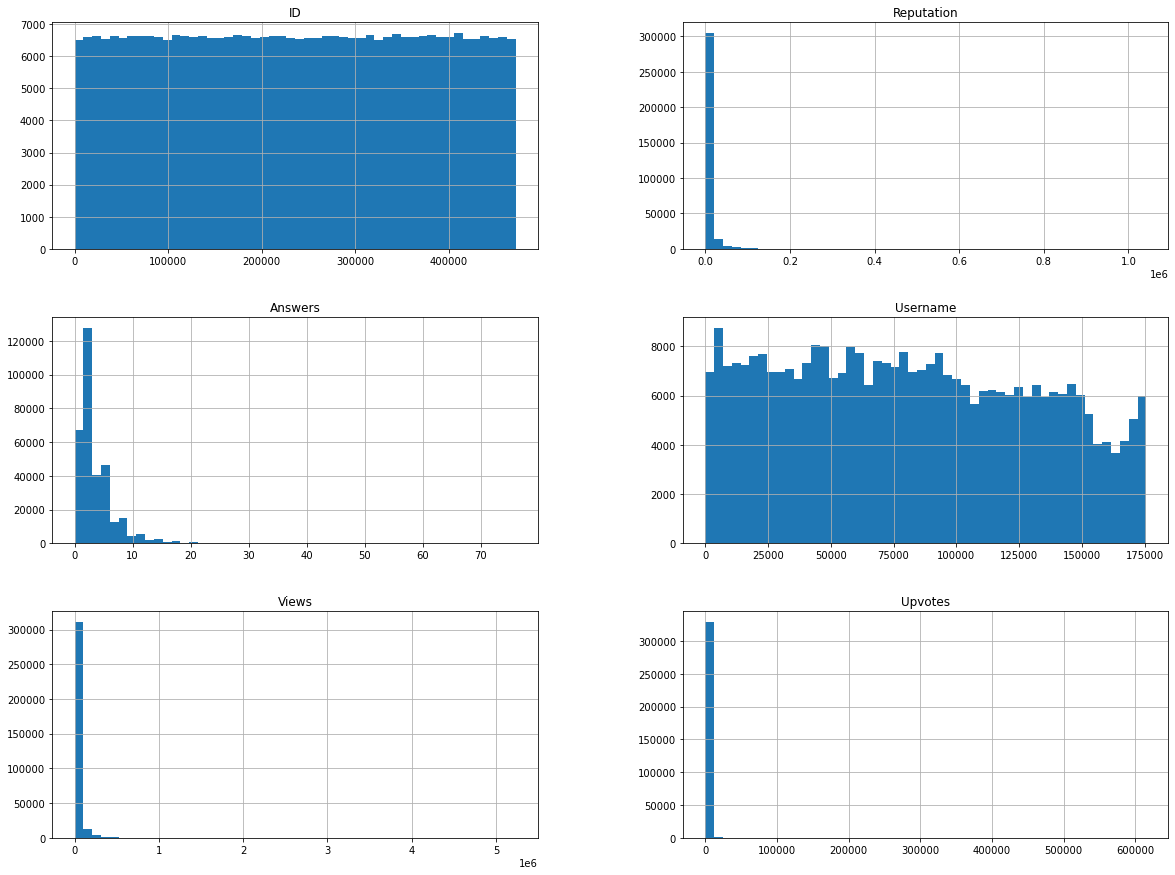

In [18]:
reddit_upvotes_train_df.hist(bins=50, figsize=(20,15))
plt.show()

In [19]:
reddit_upvotes_train_df.isna().sum().sum()

0

In [20]:
for columnName in reddit_upvotes_train_df:
    print(columnName, reddit_upvotes_train_df[columnName].dtypes)

ID int64
Tag object
Reputation float64
Answers float64
Username int64
Views float64
Upvotes float64


##### explore uber fares data

In [21]:
uber_fares_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 200000 entries, 24238194 to 11951496
Data columns (total 8 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   key                200000 non-null  object 
 1   fare_amount        200000 non-null  float64
 2   pickup_datetime    200000 non-null  object 
 3   pickup_longitude   200000 non-null  float64
 4   pickup_latitude    200000 non-null  float64
 5   dropoff_longitude  199999 non-null  float64
 6   dropoff_latitude   199999 non-null  float64
 7   passenger_count    200000 non-null  int64  
dtypes: float64(5), int64(1), object(2)
memory usage: 13.7+ MB


In [22]:
uber_fares_df.describe()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
count,200000.000000,200000.000000,200000.000000,199999.000000,199999.000000,200000.000000
mean,11.359955,-72.527638,39.935885,-72.525292,39.923890,1.684535
std,9.901776,11.437787,7.720539,13.117408,6.794829,1.385997
min,-52.000000,-1340.648410,-74.015515,-3356.666300,-881.985513,0.000000
25%,6.000000,-73.992065,40.734796,-73.991407,40.733823,1.000000
50%,8.500000,-73.981823,40.752592,-73.980093,40.753042,1.000000
75%,12.500000,-73.967154,40.767158,-73.963658,40.768001,2.000000
max,499.000000,57.418457,1644.421482,1153.572603,872.697628,208.000000


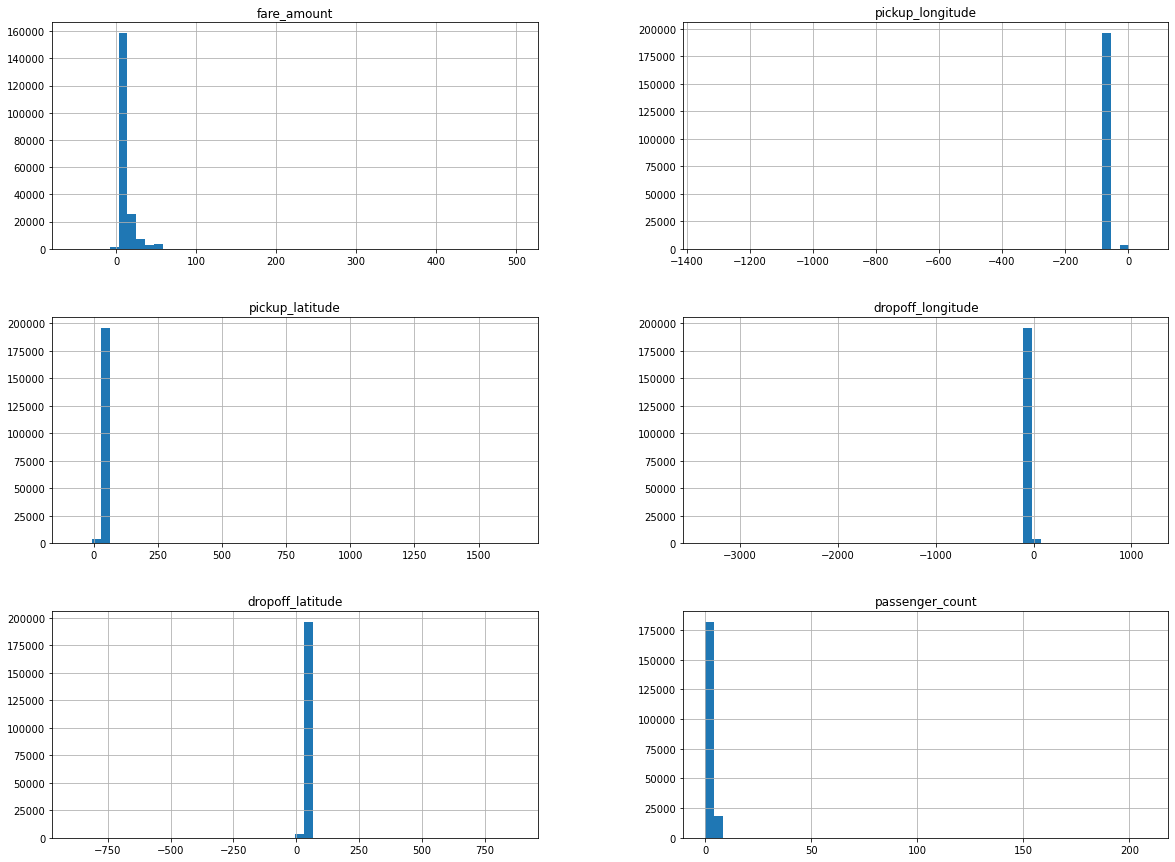

In [23]:
uber_fares_df.hist(bins=50, figsize=(20,15))
plt.show()

In [24]:
uber_fares_df.isna().sum().sum()

2

In [25]:
for columnName in uber_fares_df:
    print(columnName, uber_fares_df[columnName].isna().sum())

key 0
fare_amount 0
pickup_datetime 0
pickup_longitude 0
pickup_latitude 0
dropoff_longitude 1
dropoff_latitude 1
passenger_count 0


In [26]:
# since only two datapoints in entire dataframe are null, simply remove rows where null data is
uber_fares_df = uber_fares_df.dropna()

In [27]:
uber_fares_df.isna().sum().sum()

0

In [28]:
for columnName in uber_fares_df:
    print(columnName, uber_fares_df[columnName].dtypes)

key object
fare_amount float64
pickup_datetime object
pickup_longitude float64
pickup_latitude float64
dropoff_longitude float64
dropoff_latitude float64
passenger_count int64


#### executing tasks on real estate df

## Executing tasks on reddit train df

### Preparing Data:

In [29]:
# checking attribute correlation to upvotes
corr_matrix = reddit_upvotes_train_df.corr()
corr_matrix["Upvotes"].sort_values(ascending=False)

Upvotes       1.000000
Views         0.437336
Reputation    0.266710
Answers       0.202033
ID            0.006328
Username     -0.011970
Name: Upvotes, dtype: float64

In [30]:
# checking combo attributes
upvotes_copy = reddit_upvotes_train_df.copy()

upvotes_copy["rep_per_view"] = upvotes_copy["Reputation"] / upvotes_copy["Views"]
upvotes_copy["view_per_rep"] = upvotes_copy["Views"] / upvotes_copy["Reputation"]
upvotes_copy["ans_per_view"] = upvotes_copy["Answers"] / upvotes_copy["Views"]

corr_matrix = upvotes_copy.corr()
corr_matrix["Upvotes"].sort_values(ascending=False)

Upvotes         1.000000
Views           0.437336
Reputation      0.266710
Answers         0.202033
ID              0.006328
rep_per_view   -0.002555
view_per_rep   -0.004377
Username       -0.011970
ans_per_view   -0.026467
Name: Upvotes, dtype: float64

<AxesSubplot:xlabel='Views', ylabel='Upvotes'>

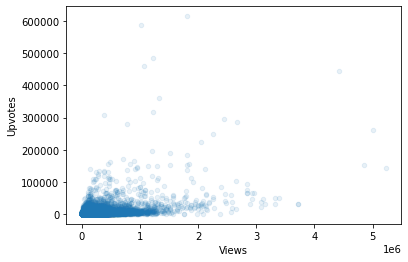

In [31]:
# looking at scatter plot for upvotes per views
reddit_upvotes_train_df.plot(kind="scatter", x="Views", y="Upvotes", alpha=0.1)

In [32]:
# remove categorical attribute tag from df
train_numerical = reddit_upvotes_train_df.copy().drop("Tag", axis=1)
test_numerical = reddit_upvotes_test_df.copy().drop("Tag", axis=1)
train_numerical

,ID,Reputation,Answers,Username,Views,Upvotes
0,52664,3942.0,2.0,155623,7855.0,42.0
1,327662,26046.0,12.0,21781,55801.0,1175.0
2,468453,1358.0,4.0,56177,8067.0,60.0
3,96996,264.0,3.0,168793,27064.0,9.0
4,131465,4271.0,4.0,112223,13986.0,83.0
...,...,...,...,...,...,...
330040,339800,36.0,2.0,84919,1063.0,0.0
330041,253800,1649.0,2.0,76730,23319.0,73.0
330042,210756,6178.0,2.0,91701,2453.0,15.0
330043,56089,89.0,2.0,80245,2107.0,3.0


### Scaling Data

In [33]:
from sklearn import preprocessing

# scalar = preprocessing.StandardScaler().fit(train_numerical)
# X = scalar.transform(train_numerical)
# prepared_train = pd.DataFrame(X, columns=train_numerical.columns,
#                           index=train_numerical.index)

train_labels = train_numerical["Upvotes"].copy()
prepared_train = train_numerical.copy().drop("Upvotes", axis = 1)
train_labels

0           42.0
1         1175.0
2           60.0
3            9.0
4           83.0
           ...  
330040       0.0
330041      73.0
330042      15.0
330043       3.0
330044      37.0
Name: Upvotes, Length: 330045, dtype: float64

In [34]:
# Train using forest regression
from sklearn.ensemble import RandomForestRegressor

forest_reg = RandomForestRegressor(n_estimators=10,
                             max_depth=10,
                             criterion='squared_error',
                            )
forest_reg.fit(prepared_train, train_labels)

RandomForestRegressor(max_depth=10, n_estimators=10)

In [35]:
# trying it on training data
small_data = prepared_train.iloc[:5]
small_labels = train_labels.iloc[:5]
print("Predictions:", forest_reg.predict(small_data))

Predictions: [  42.35800995 1553.07367498   27.80665836   37.48349539   76.47172619]


In [36]:
print("Labels:", list(small_labels))

Labels: [42.0, 1175.0, 60.0, 9.0, 83.0]


### Task #1: K-Fold Cross Validation

In [37]:
from sklearn.model_selection import cross_val_score

def display_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std())

x_train = prepared_train[:10000]
y_train = train_labels[:10000]
    
reg_scores = cross_val_score(forest_reg, x_train, y_train, scoring="neg_mean_squared_error", cv=10)
reg_rmse_scores = np.sqrt(-reg_scores)

display_scores(reg_rmse_scores)

Scores: [1538.53482903  466.25430555  320.10193577 2860.56707664 1130.68228851
  720.87343234 1297.94692758  649.00084947 1135.26071173  363.78462643]
Mean: 1048.3006983040304
Standard deviation: 721.4966123691754


### Task #2: StratifiedK-Fold Cross Validation

In [38]:
# for classifier I will be using the "tag" attribute as the target (also I reduced the data set size to 1000 because my laptop is weak)
from sklearn.model_selection import StratifiedKFold
from sklearn.base import clone
from sklearn.preprocessing import LabelEncoder
import tensorflow as tf
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

y_train_cat = reddit_upvotes_train_df["Tag"][:10000]

svm_clf = SVC()
svm_clf.fit(x_train, y_train_cat)

cnt = 1
skf = StratifiedKFold(n_splits=3, shuffle=False)
for train_index, test_index in skf.split(x_train, y_train_cat):
    clone_clf = clone(svm_clf)
    x_train_folds = x_train.iloc[train_index]
    y_train_folds = y_train_cat[train_index]
    
    clone_clf.fit(x_train_folds, y_train_folds)
    y_pred = clone_clf.predict(x_train_folds)
    print("Accuracy for Fold", cnt, ":", accuracy_score(y_train_folds, y_pred))
    cnt += 1

Accuracy for Fold 1 : 0.24722472247224722
Accuracy for Fold 2 : 0.24508774561271937
Accuracy for Fold 3 : 0.2416379181040948


### Task #3: Use sklearn.mean_squared_error and One Other Option to Evaluate Model Performance

#### Mean Squared Error

In [39]:
from sklearn.metrics import mean_squared_error

predictions = forest_reg.predict(x_train)
reg_mse = mean_squared_error(y_train, predictions)
print("MSE:", reg_mse)
reg_rmse = np.sqrt(reg_mse)
print("RMSE:", reg_rmse)

MSE: 177043.4270243396
RMSE: 420.765287332902


#### R^2 Score

In [40]:
from sklearn.metrics import r2_score

r2 = r2_score(y_train, predictions)
r2

0.9583535105785499

### Task #4: Generate a Confusion Matrix

In [42]:
# confusion matrix
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_predict

y_pred = cross_val_predict(svm_clf, x_train, y_train_cat, cv=3)
confusion_matrix(y_train_cat, y_pred)

array([[   0,  657,    0,    0,  283,    0,    0,    0,    1,    0],
       [   0, 1621,    0,    0,  525,    0,    0,    0,    0,    0],
       [   0,  481,    0,    0,  183,    0,    0,    0,    1,    0],
       [   0,  817,    0,    0,  174,    0,    0,    0,    0,    0],
       [   0, 1463,    0,    0,  748,    0,    0,    0,    1,    0],
       [   0,  367,    0,    0,   72,    0,    0,    0,    0,    0],
       [   0,  937,    0,    0,  356,    0,    0,    0,    2,    0],
       [   0,  336,    0,    0,   44,    0,    0,    0,    0,    0],
       [   0,  556,    0,    0,  177,    0,    0,    0,    0,    0],
       [   0,  166,    0,    0,   32,    0,    0,    0,    0,    0]],
      dtype=int64)

### Task #5: Generate ROC Curve

In [43]:
# logistic regression for multi-class classification using a one-vs-rest (must convert into binary classification to do this task)
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.multiclass import OneVsRestClassifier

model = LogisticRegression()
ovr = OneVsRestClassifier(model)
ovr.fit(x_train, y_train_cat)
yhat = ovr.predict(x_train)

In [44]:
from sklearn.metrics import roc_curve

y_scores = cross_val_predict(ovr, x_train, yhat, cv=3,
                             method="decision_function")
fpr, tpr, thresholds = roc_curve(yhat, y_scores, pos_label={'c', 'j'})

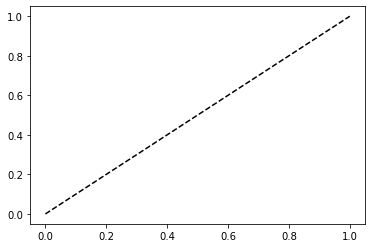

In [45]:
def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'k--') # Dashed diagonal
    
plot_roc_curve(fpr, tpr)
plt.show()

### Task #6: Use Grid Search CV to Tune Hyperparameters

In [46]:
from sklearn.model_selection import GridSearchCV

param_grid = [
    {'n_estimators': [3, 10, 30], 'max_features': [2, 4, 6, 8]},
    {'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4]},
  ]

new_forest_reg = RandomForestRegressor()
grid_search = GridSearchCV(new_forest_reg, param_grid, cv=5,
                           scoring='neg_mean_squared_error',
                           return_train_score=True)

grid_search.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid=[{'max_features': [2, 4, 6, 8],
                          'n_estimators': [3, 10, 30]},
                         {'bootstrap': [False], 'max_features': [2, 3, 4],
                          'n_estimators': [3, 10]}],
             return_train_score=True, scoring='neg_mean_squared_error')

In [47]:
cvres = grid_search.cv_results_

for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)

1557.1696201977056 {'max_features': 2, 'n_estimators': 3}
1450.599990193713 {'max_features': 2, 'n_estimators': 10}
1323.1875912075607 {'max_features': 2, 'n_estimators': 30}
1466.790585871071 {'max_features': 4, 'n_estimators': 3}
1251.5091606432609 {'max_features': 4, 'n_estimators': 10}
1261.0657738183647 {'max_features': 4, 'n_estimators': 30}
nan {'max_features': 6, 'n_estimators': 3}
nan {'max_features': 6, 'n_estimators': 10}
nan {'max_features': 6, 'n_estimators': 30}
nan {'max_features': 8, 'n_estimators': 3}
nan {'max_features': 8, 'n_estimators': 10}
nan {'max_features': 8, 'n_estimators': 30}
1397.2503713484325 {'bootstrap': False, 'max_features': 2, 'n_estimators': 3}
1343.152924061516 {'bootstrap': False, 'max_features': 2, 'n_estimators': 10}
1170.1827954402868 {'bootstrap': False, 'max_features': 3, 'n_estimators': 3}
1264.5953461162983 {'bootstrap': False, 'max_features': 3, 'n_estimators': 10}
1171.6067405206122 {'bootstrap': False, 'max_features': 4, 'n_estimators': 

In [48]:
grid_search.best_estimator_

RandomForestRegressor(bootstrap=False, max_features=4, n_estimators=10)

### Task #7: Use an Ensemble of Methods

In [52]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.svm import SVC

small_x = x_train[:1000]
small_y = y_train[:1000]

log_clf = LogisticRegression()
rnd_clf = RandomForestClassifier()
svm_clf = SVC()

voting_clf = VotingClassifier(
    estimators=[('', log_clf), ('rf', rnd_clf), ('sv', svm_clf)],
    voting='hard')
voting_clf.fit(small_x, small_y)

ValueError: The estimator RandomForestRegressor should be a classifier.

In [50]:
# y_pred = ensemble_clf.predict(x_train)
# print("Ensemble Accuracy: ", accuracy_score(y_train, y_pred))

NameError: name 'ensemble_clf' is not defined

In [ ]:
# print(y_train)
# print(y_pred)

### Task #5: Evaluate Your System on the Test Data

In [ ]:
# pred = lin_reg.predict(test_numerical)
# result = pd.DataFrame(X, columns=test_numerical.columns,
#                           index=test_numerical.index)
# result
# test_numerical.shape

#### executing tasks on uber fares df